In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv("Twitter_Data.csv")

In [3]:
data.shape

(162980, 2)

In [4]:
data.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [5]:
data.dropna(inplace=True)

In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162969 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162969 non-null  object 
 1   category    162969 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.1+ MB
None


In [7]:
data["clean_text"]=data["clean_text"].apply(lambda x:x.split())

In [8]:
data.shape

(162969, 2)

In [9]:
data.head(3)

,clean_text,category
0,"[when, modi, promised, “minimum, government, m...",-1.0
1,"[talk, all, the, nonsense, and, continue, all,...",0.0
2,"[what, did, just, say, vote, for, modi, welcom...",1.0


In [10]:
data.dropna(inplace=True)

In [11]:
data["length_asntance"]=data["clean_text"].apply(lambda x:len(x))

In [12]:
data.head(2)

,clean_text,category,length_asntance
0,"[when, modi, promised, “minimum, government, m...",-1.0,33
1,"[talk, all, the, nonsense, and, continue, all,...",0.0,13


<AxesSubplot:>

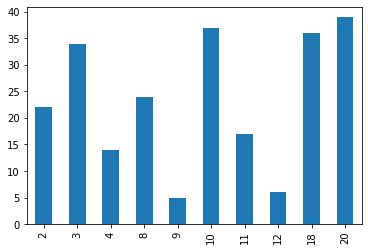

In [13]:
data[data["category"]==1]["length_asntance"].iloc[:10].plot(kind="bar")

<AxesSubplot:>

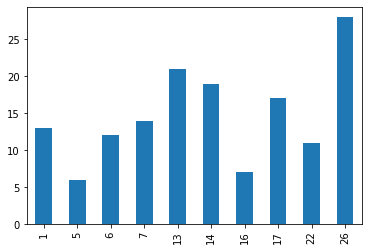

In [14]:
data[data["category"]==0]["length_asntance"].iloc[:10].plot(kind="bar")

<AxesSubplot:>

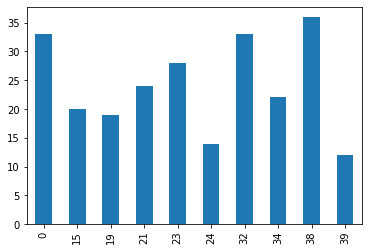

In [15]:
data[data["category"]==-1]["length_asntance"].iloc[:10].plot(kind="bar")

In [16]:
data["cat"]=data["category"].replace([1,0,-1],["pos","neu","neg"])

pos    72249
neu    55211
neg    35509
Name: cat, dtype: int64


<AxesSubplot:ylabel='cat'>

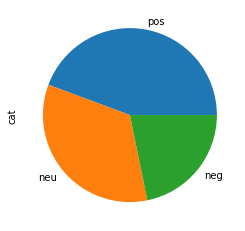

In [17]:
print(data["cat"].value_counts())
data["cat"].value_counts().plot(kind="pie")

In [18]:
lp=[]

In [19]:

lp.append(data[data["category"]==-1]["length_asntance"].mean())# negative

In [20]:

lp.append(data[data["category"]==0]["length_asntance"].mean())# netural

In [21]:

lp.append(data[data["category"]==1]["length_asntance"].mean())# positive

[23.880621814187954, 14.271105395663907, 22.65267339340337]


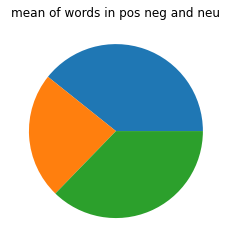

In [22]:
print(lp)
plt.pie(lp)
plt.title("mean of words in pos neg and neu")
plt.show()

In [23]:
def remo_stop(a):
    l=[]
    for i in  a:
        if i not in stopwords.words("english"):
            l.append(i)
    return l
        
    

In [24]:
remo_stop(data.iloc[0]["clean_text"])

['modi',
 'promised',
 '“minimum',
 'government',
 'maximum',
 'governance”',
 'expected',
 'begin',
 'difficult',
 'job',
 'reforming',
 'state',
 'take',
 'years',
 'get',
 'justice',
 'state',
 'business',
 'exit',
 'psus',
 'temples']

In [ ]:
def stree(data):
    l=[]
    s=PorterStemmer()
    for i in data:
        l.append(s.stem(i))
    return " ".join(l)

In [ ]:
dat1=pd.DataFrame()

In [ ]:
dat1["clean"]=data.iloc[0:5000]["clean_text"].apply(stree)

In [ ]:
dat1["cat"]=data.iloc[0:5000]["category"]

In [ ]:
dat1.head()

In [ ]:
dat1.shape

In [ ]:
cv=CountVectorizer(max_features=3000,stop_words="english")
vector=cv.fit_transform(dat1["clean"]).toarray()
vector

In [ ]:
vector.shape

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(vector[0:5000],dat1.iloc[0:5000]["cat"],test_size=.2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB


In [ ]:
m1=GaussianNB()
m2=MultinomialNB()
m3=BernoulliNB()

In [ ]:
m1.fit(x_train,y_train)
m2.fit(x_train,y_train)
m3.fit(x_train,y_train)

In [ ]:
p1=m1.predict(x_train)
p2=m2.predict(x_train)
p3=m3.predict(x_train)

In [ ]:
print("gn",accuracy_score(y_train,p1))
print("mn",accuracy_score(y_train,p2))
print("bn",accuracy_score(y_train,p3))

In [ ]:
p1t=m1.predict(x_test)
p2t=m2.predict(x_test)
p3t=m3.predict(x_test)